#Hands-on Activity 11.1 Linear Regression Analysis

##Objective(s):
This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem
Links to an external site.

##Intended Learning Outcomes (ILOs):
- Demonstrate how to solve regression problems using simple linear regression
- Use the linear regression model to predict the target value

In [ ]:
!pip install hvplot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['Country', 'Status']


In [ ]:
df[categorical].head()

Country      Status
0  Afghanistan  Developing
1  Afghanistan  Developing
2  Afghanistan  Developing
3  Afghanistan  Developing
4  Afghanistan  Developing

In [ ]:
#check missing values
df[categorical].isnull().sum()

Country    0
Status     0
dtype: int64

In [ ]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype != 'O']

print('There are {} numerical variables\n'. format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
df[numerical].head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [ ]:
#cheack missing values
df[numerical].isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# remove the missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
df[numerical].isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
new_df = df.drop(columns=['Year', 'Country', 'Status'])


In [ ]:
new_df

Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0                 65.0            263.0             62     0.01   
1                 59.9            271.0             64     0.01   
2                 59.9            268.0             66     0.01   
3                 59.5            272.0             69     0.01   
4                 59.2            275.0             71     0.01   
...                ...              ...            ...      ...   
2933              44.3            723.0             27     4.36   
2934              44.5            715.0             26     4.06   
2935              44.8             73.0             25     4.43   
2936              45.3            686.0             25     1.72   
2937              46.0            665.0             24     1.68   

      percentage expenditure  Hepatitis B  Measles    BMI   \
0                  71.279624         65.0      1154   19.1   
1                  73.523582         62.0       492   18.6   
2                  73.219243         64.0       430   18.1   
3                  78.184215         67.0      2787   17.6   
4                   7.097109         68.0      3013   17.2   
...                      ...          ...       ...    ...   
2933                0.000000         68.0        31   27.1   
2934                0.000000          7.0       998   26.7   
2935                0.000000         73.0       304   26.3   
2936                0.000000         76.0       529   25.9   
2937                0.000000         79.0      1483   25.5   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0                     83    6.0               8.16         65.0        0.1   
1                     86   58.0               8.18         62.0        0.1   
2                     89   62.0               8.13         64.0        0.1   
3                     93   67.0               8.52         67.0        0.1   
4                     97   68.0               7.87         68.0        0.1   
...                  ...    ...                ...          ...        ...   
2933                  42   67.0               7.13         65.0       33.6   
2934                  41    7.0               6.52         68.0       36.7   
2935                  40   73.0               6.53         71.0       39.8   
2936                  39   76.0               6.16         75.0       42.1   
2937                  39   78.0               7.10         78.0       43.5   

             GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0     584.259210  33736494.0                   17.2                 17.3   
1     612.696514    327582.0                   17.5                 17.5   
2     631.744976  31731688.0                   17.7                 17.7   
3     669.959000   3696958.0                   17.9                 18.0   
4      63.537231   2978599.0                   18.2                 18.2   
...          ...         ...                    ...                  ...   
2933  454.366654  12777511.0                    9.4                  9.4   
2934  453.351155  12633897.0                    9.8                  9.9   
2935   57.348340    125525.0                    1.2                  1.3   
2936  548.587312  12366165.0                    1.6                  1.7   
2937  547.358878  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        

<Axes: >

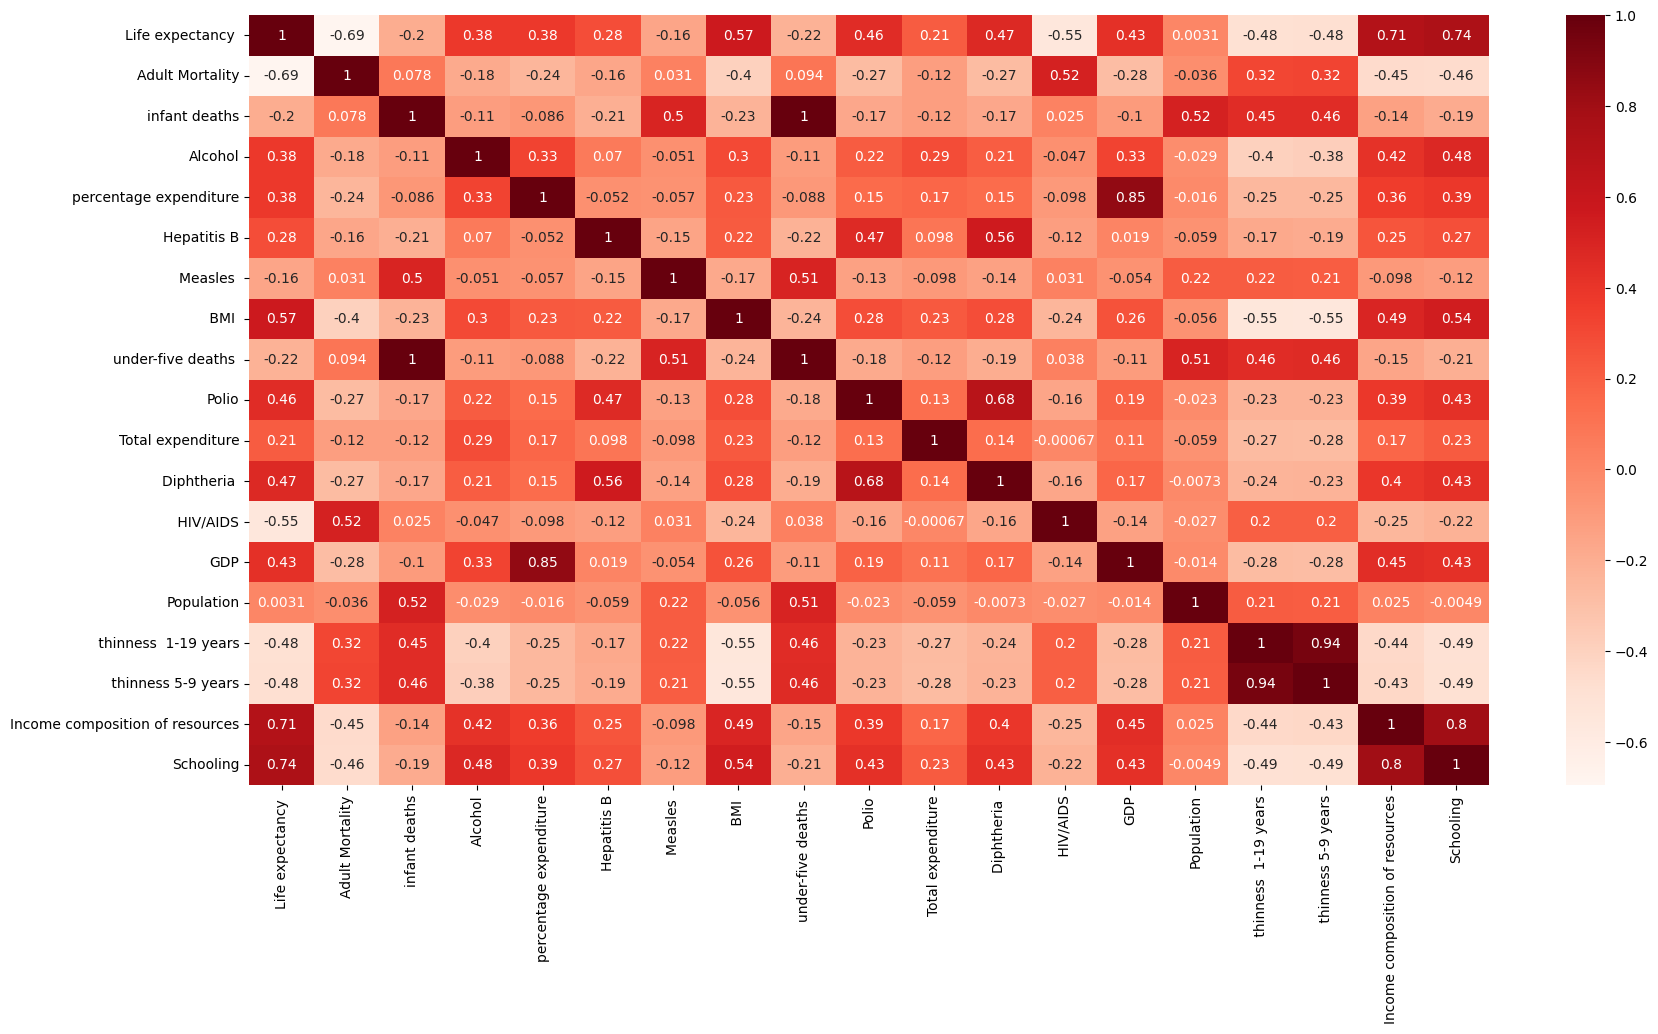

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(new_df.corr(), annot=True,cmap='Reds')

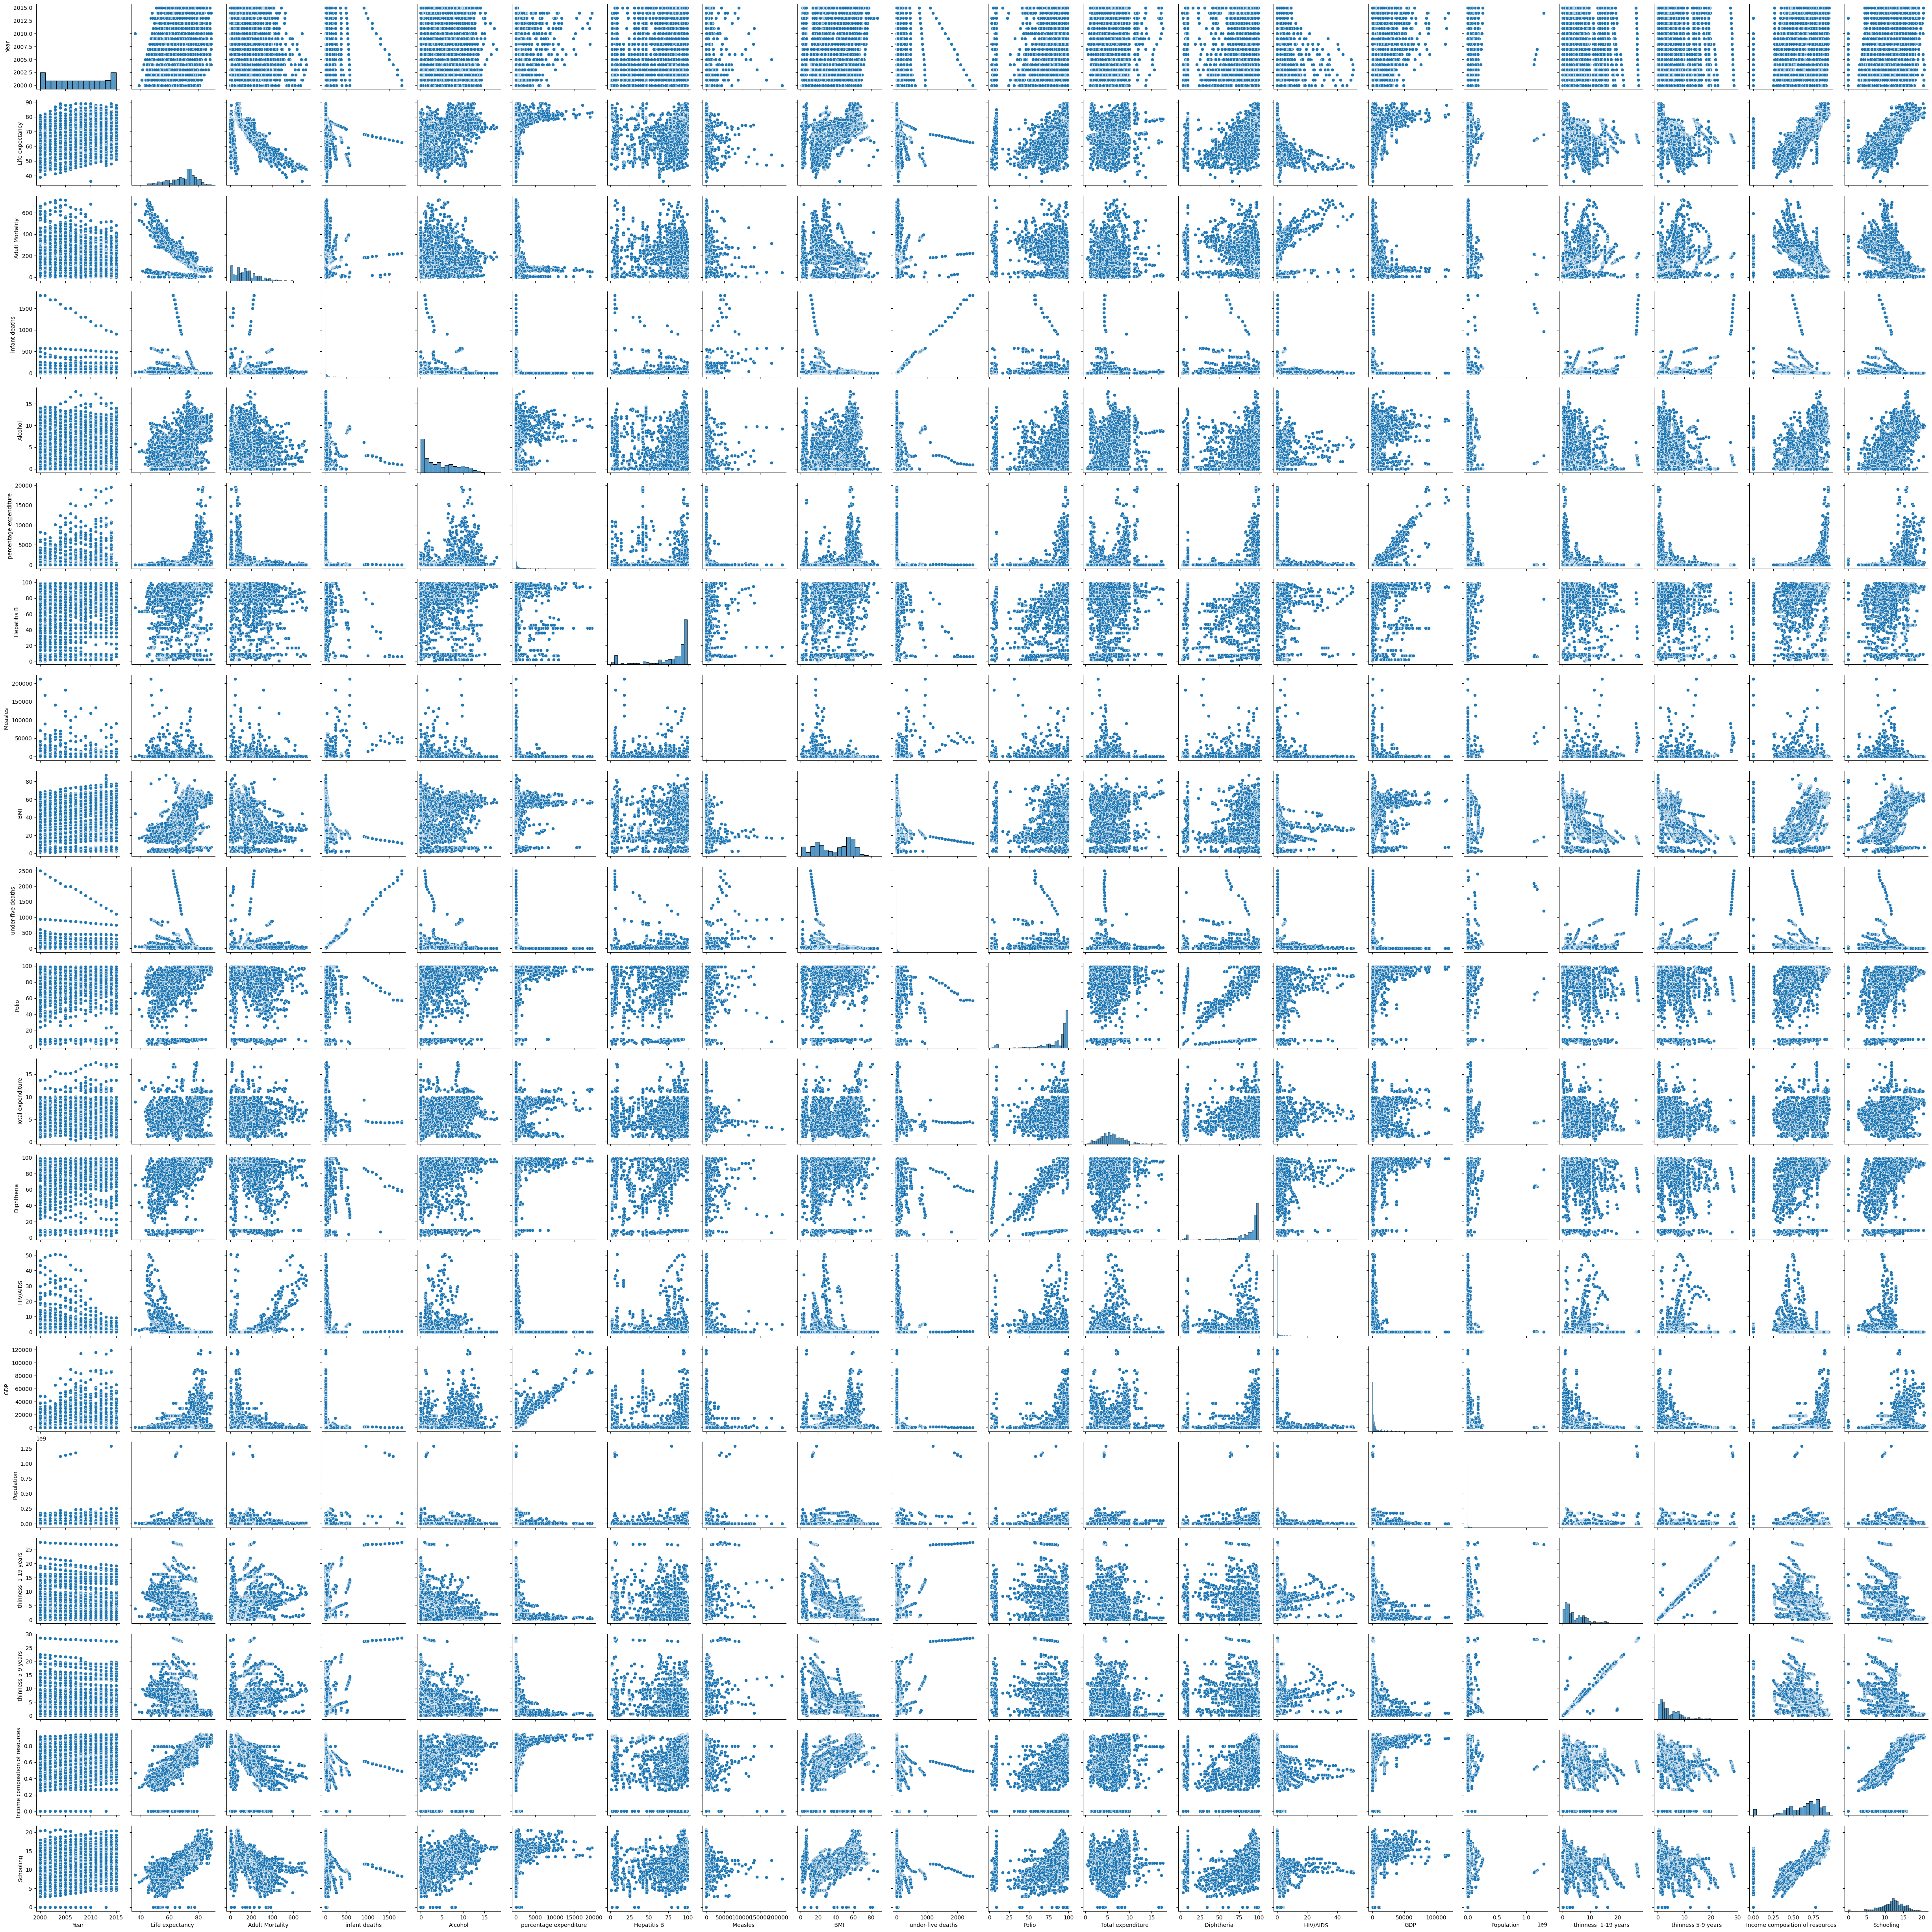

In [ ]:
sns.pairplot(df)

In [ ]:
X=new_df.drop('GDP', axis=1)

y=new_df['percentage expenditure']

In [ ]:
print("X=",X.shape,"\ny=", y.shape)

X= (2938, 18) 
y= (2938,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

(2056, 18)

In [ ]:
X_test.shape

(882, 18)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

Coedicients
Life expectancy                  7.286937e-11
Adult Mortality                  7.643313e-12
infant deaths                    1.175952e-12
Alcohol                          1.766267e-13
percentage expenditure           1.000000e+00
Hepatitis B                      3.657574e-14
Measles                         -9.206747e-16
 BMI                            -2.535250e-14
under-five deaths               -2.455056e-14
Polio                            2.842111e-14
Total expenditure               -3.882626e-13
Diphtheria                      -2.045927e-13
 HIV/AIDS                        8.508927e-13
Population                      -1.156123e-17
 thinness  1-19 years            7.907558e-17
 thinness 5-9 years             -3.190725e-16
Income composition of resources -2.017455e-14
Schooling                        1.526131e-16

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [ ]:
#Mean Absolute Error
MAE

5.415424312240713e-10

In [ ]:
#Mean Squered Error
MSE

7.482626985194715e-19

In [ ]:
#Root mean Squared Error
MSE

7.482626985194715e-19

In [ ]:
new_df['percentage expenditure'].mean()

738.2512954533831

In [ ]:
test_residual= y_test - y_pred

<Axes: ylabel='Density'>

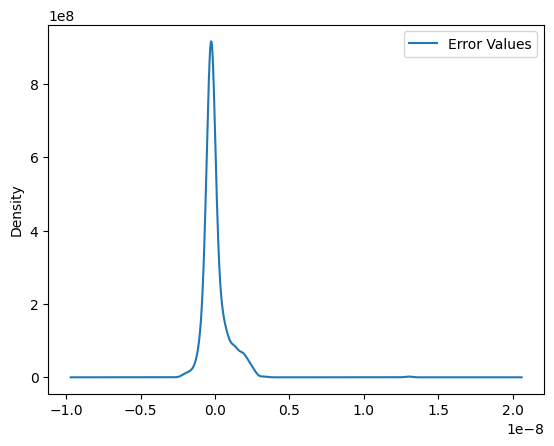

In [ ]:
pd.DataFrame({'Error Values': (test_residual)}).plot.kde()

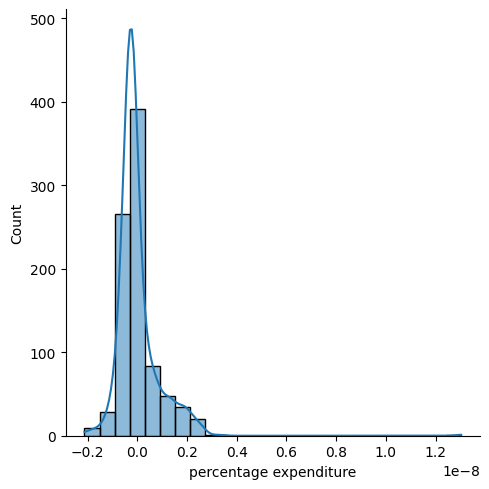

In [ ]:
sns.displot(test_residual, bins=25, kde=True)

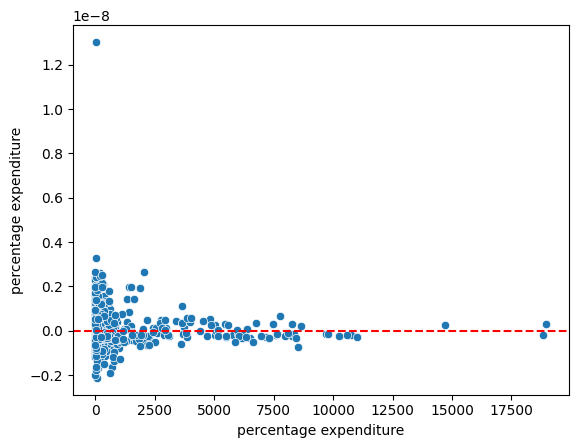

In [ ]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')